# Acceleration

## Shanks Transformation

Shanks transformation, also known as Shanks method or epsilon algorithm, is a non-linear series acceleration method to increase the rate of convergence of a sequence. This method is named after Daniel Shanks in the 1950s.

The Shanks transformation is based on the idea of creating a new sequence from the original one, which converges faster to the same limit. The transformed sequence is built by considering the differences between consecutive terms of the original sequence and applying a specific formula. The process can be applied iteratively to further improve the convergence rate.

We introduce a convergent sequence $\{a_n\}_{n\in\mathbb{N}}$, the sum of the first $i$ terms can be described as $ S_i = \sum\limits_{n=0}^{i}a_n $, and forms a new sequence $\{S_i\}_{i\in\mathbb{N}}$.

Provided the series converges, $S_i$ will also converge to $S$ as $n→∞$. The Shanks transformation $L(S_i)$ is defined by:

$$\begin{aligned}
L(S_i) &= S_{i+1} - \frac{(S_{i+1}-S_i)^2}{(S_{i+1}-S_i)-(S_i-S_{i-1})} \\ 
&= \frac{S_{i+1}S_{i-1}-S_i^2}{S_{i+1}-2S_i+S_{i-1}}\end{aligned}$$


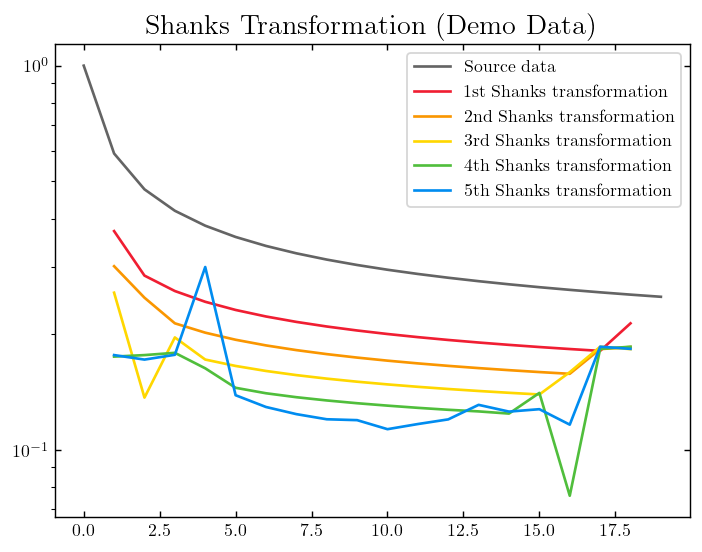

In [119]:
# Shanks Transformation

import numpy as np
import matplotlib; import matplotlib.pyplot as plt

def shanks_transformation_vectorized(data):
    shifted_left = np.roll(data, -1)
    shifted_right = np.roll(data, 1)

    numerator = data ** 2 - shifted_right * shifted_left
    denominator = 2 * data - shifted_right - shifted_left

    transformed_data = np.where((np.arange(len(data)) > 0) & (np.arange(len(data)) < len(data) - 1), numerator / denominator, 0)
    
    return transformed_data

def apply_shanks_transformations(data, num_iterations):
    return [data := shanks_transformation_vectorized(data) for _ in range(num_iterations+1)]

# Generate a new dataset using the function f(x) = 1/(1+log(x+1))
X_demo = np.arange(0, 20)
Y_demo = 1/(1+np.log(X_demo+1))

# Apply Shanks transformations
num_iterations = 5
transformed_data_list_demo = apply_shanks_transformations(Y_demo, num_iterations)

# Set up the specified style parameters
plt.figure(dpi=128)
params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)
plt.tick_params(direction="in", top=True, right=True, bottom=True, left=True)

# Plot the new data and Shanks transformations
plt.title("Shanks Transformation (Demo Data)")
plt.plot(X_demo, Y_demo, c="#646464", label="Source data")

colors = ["#F01E32", "#FA9600", "#FFD700", "#50BE3C", "#008CF0", "#8C64F0"]
labels = ["1st Shanks transformation", "2nd Shanks transformation", "3rd Shanks transformation", "4th Shanks transformation", "5th Shanks transformation", "6th Shanks transformation"]

for i in range(1, num_iterations + 1):
    transformed_data = transformed_data_list_demo[i]
    plt.plot(X_demo[1:len(transformed_data)-1], transformed_data[1:len(transformed_data)-1], c=colors[i-1], label=labels[i-1])

plt.yscale('log')
plt.legend(loc="best")
plt.show()


## Richardson Extrapolation

Richardson extrapolation is named because of Lewis Fry Richardson, which is a sequence acceleration method used to improve the rate of convergence of a sequence of estimates of some value $A^*=\lim\limits_{n→0}A(n)$.

$$ R_1(n) = \frac{(n+1)A(n+1)-h*A(n)}{1!} $$

$$ R_2(h) = \frac{(n+2)^2A(n+1)-2(n+1)^2A(n+1)+n^2A(n)}{2!} $$


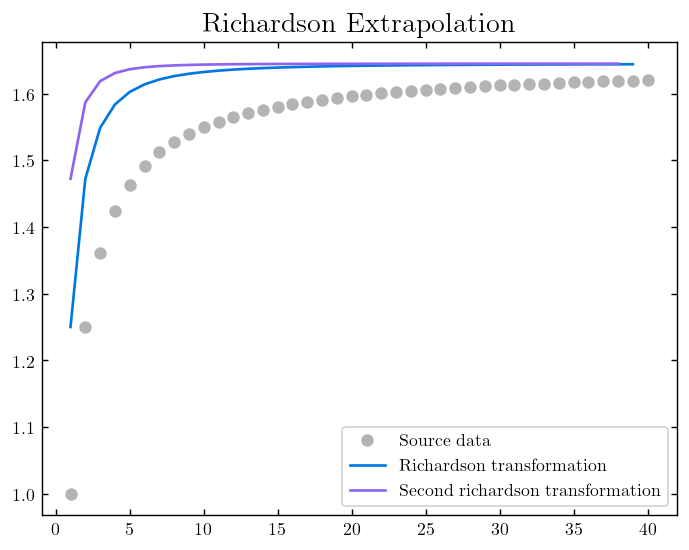

In [45]:
# Richardson Extrapolation

import numpy as np
import matplotlib; import matplotlib.pyplot as plt

X,Y = np.loadtxt('../Appendix Data Manipulation/Data/Progressive0.dat', unpack=True)
count = len(X)

def RE1(Y):
    R1 = np.ones(count)
    for i in range(0, count - 1):
        if i < count - 1 :
            R1[i] = ((i+1)*Y[i+1]-i*Y[i])/np.math.factorial(1)
        else:
            R1[i] = 0
        i = i + 1
    return R1

def RE2(Y):
    R2 = np.ones(count)
    for i in range(0, count - 2):
        if i < count - 2 :
            R2[i] = ((i+2)**2*Y[i+2]-2*(i+1)**2*Y[i+1]+i**2*Y[i])/np.math.factorial(2)
        else:
            R2[i] = 0
        i = i + 1
    return R2

U1 = RE1(Y)
U2 = RE2(Y)

plt.figure(dpi=128); params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
matplotlib.rcParams.update(params)
plt.tick_params(direction="in",top=True,right=True,bottom=True,left=True)

plt.title("Richardson Extrapolation")
plt.plot(X, Y, "o", c="#B4B4B4", label="Source data")
plt.plot(X[0:len(U1)-1], U1[0:len(U1)-1], c="#0078E1", label="Richardson transformation")
plt.plot(X[0:len(U2)-2], U2[0:len(U1)-2], c="#8C64F0", label="Second richardson transformation")
plt.legend(loc="best")